# Thinkful Data Science Prep Capstone

## Chicago: Brief Examination of Health Statistics of the City of Neighborhoods


### Overview:
When studying health and mortality, there are highly discussed causes of death which are cancer, diabetes, and stroke (often connected to cardiovascular health).  In Chicago, we have highly-publicized gunfire deaths.  Chicago is also known as the city of neighborhoods—77 in fact.  We will briefly examine our Chicago neighborhoods and the economic factors which may affect our health, including gun deaths.


__Content and Context__<br>
This is a dataset hosted by the City of Chicago. The city has an open data platform found at this [link](https://data.cityofchicago.org/) and they update their information according the amount of data that is brought in. Explore the City of Chicago using Kaggle and all of the data sources available through the City of Chicago organization page.

Overall time period 2005-2011 [Link](https://www.kaggle.com/chicago/chicago-public-health-statistics) to Kaggle dataset. 

Update Frequency: This dataset is updated quarterly.

Acknowledgements: This dataset is maintained using Socrata's API and Kaggle's API. Socrata has assisted countless organizations with hosting their open data and has been an integral part of the process of bringing more data to the public.

This dataset is distributed under the following licenses: Public Domain

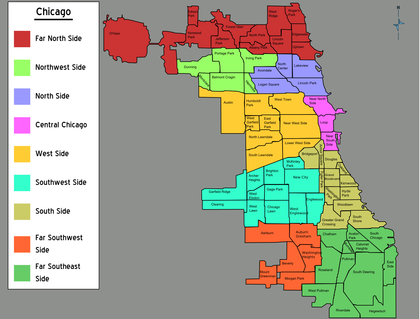


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df = pd.read_csv('public_health_statistics_chicago_community_area.csv')    

In [158]:
# drop extraneous columns
df1 = df.drop(columns=['Prostate Cancer in Males','Birth Rate','General Fertility Rate', 'Low Birth Weight','Prenatal Care Beginning in First Trimester','Preterm Births', 'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females', 'Colorectal Cancer','Infant Mortality Rate',
 'Lung Cancer', 'Childhood Blood Lead Level Screening','Childhood Lead Poisoning','Gonorrhea in Females','Gonorrhea in Males','Tuberculosis','Crowded Housing'])

In [159]:
# rename columns
df2 = df1.rename(columns = {'Community Area':'Number', 'Community Area Name': 'Neighborhood', 'Cancer (All Sites)': 'Cancer','Diabetes-related': 'Diabetes', 'Firearm-related': 'Firearms', 'Stroke (Cerebrovascular Disease)': 'Stroke', 'Below Poverty Level':'Below_Poverty_Level','No High School Diploma': 'No_H.S._Diploma', 'Per Capita Income':'Per_Capita_Income'})

In [160]:
np.shape(df2)

(77, 11)

In [161]:
list(df2)

['Number',
 'Neighborhood',
 'Cancer',
 'Diabetes',
 'Firearms',
 'Stroke',
 'Below_Poverty_Level',
 'Dependency',
 'No_H.S._Diploma',
 'Per_Capita_Income',
 'Unemployment']

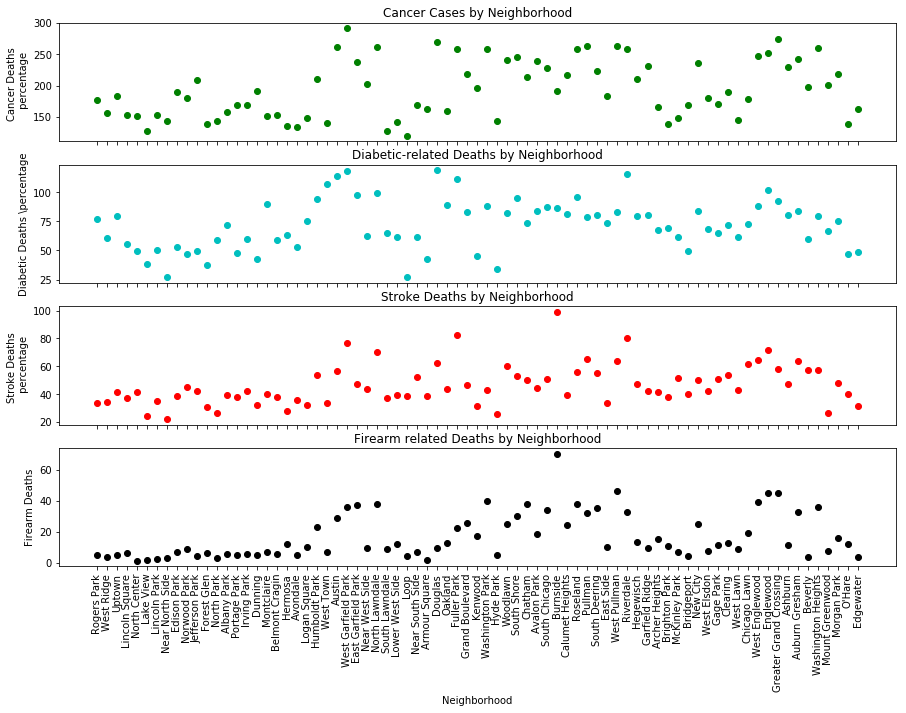

In [162]:
plt.figure(figsize=(15,10))

#Cancer info
plt.subplot(4, 1, 1)
plt.scatter(df2["Neighborhood"],df2["Cancer"], color="g")
plt.title('Cancer Cases by Neighborhood')
plt.ylabel('Cancer Deaths \n percentage')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])
#cur_axes.axes.get_yaxis().set_ticklabels([])

#Diabetic info
plt.subplot(4, 1, 2)
plt.scatter(df2["Neighborhood"],df2['Diabetes'], color="c")
#plt.xlabel("Neighborhood")
plt.ylabel("Diabetic Deaths \percentage")
plt.xticks(rotation=80)
plt.title('Diabetic-related Deaths by Neighborhood')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

#Stroke info
plt.subplot(4, 1, 3)
plt.scatter(df2["Neighborhood"],df2['Stroke'], color="r")
#plt.xlabel("Neighborhood")
plt.ylabel('Stroke Deaths \n percentage')
plt.xticks(rotation=80)
plt.title('Stroke Deaths by Neighborhood')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

#Firearm info
plt.subplot(4, 1, 4)
plt.scatter(df2["Neighborhood"],df2['Firearms'], color="black")
plt.xlabel("Neighborhood")
plt.ylabel("Firearm Deaths")
plt.xticks(rotation=90)
plt.title('Firearm related Deaths by Neighborhood')
#cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])

plt.show()

__Snapshot: Mortality Causes by Chicago Neighborhoods__

It appears cancer is fairly eveningly spread across the Chicago region.  Burnside is area is highest for both stroke and firearms death.  In fact, the stroke pattern and firearm pattern of scatterplots are similar.

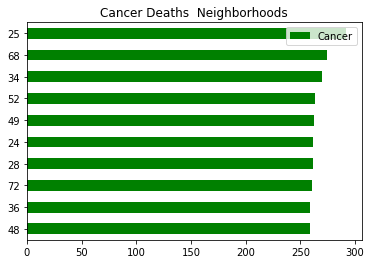

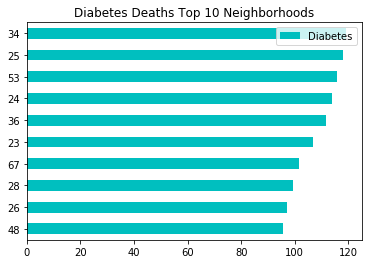

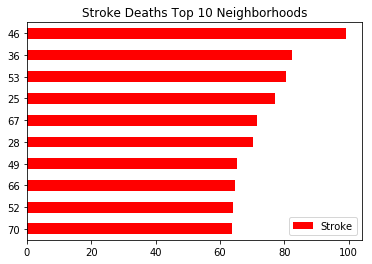

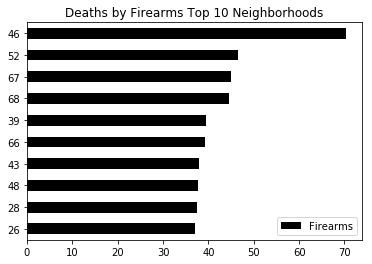

In [163]:

df2[['Neighborhood','Cancer']].sort_values("Cancer").tail(10).plot(kind="barh", color="g",title = "Cancer Deaths  Neighborhoods")
df2[['Neighborhood','Diabetes']].sort_values("Diabetes").tail(10).plot(kind="barh", color="c", title = "Diabetes Deaths Top 10 Neighborhoods")
df2[['Neighborhood','Stroke']].sort_values("Stroke").tail(10).plot(kind="barh", color="r", title= "Stroke Deaths Top 10 Neighborhoods")
df2[['Neighborhood','Firearms']].sort_values("Firearms").tail(10).plot(kind="barh", color="black", title = "Deaths by Firearms Top 10 Neighborhoods")

plt.show()

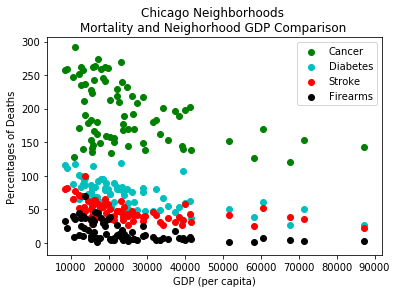

In [165]:
fig, ax = plt.subplots()

# Drawing the graph
ax.scatter(df2['Per_Capita_Income'], df2['Cancer'], color="g")
ax.scatter(df2['Per_Capita_Income'], df2['Diabetes'], color="c")
ax.scatter(df2['Per_Capita_Income'], df2['Stroke'], color="r")
ax.scatter(df2['Per_Capita_Income'], df2['Firearms'], color="k")

# Set the label for the x-axis
ax.set_xlabel("GDP (per capita)")

# Set the label for the y-axis
ax.set_ylabel("Percentages of Deaths")

ax.set_title("Chicago Neighborhoods \nMortality and Neighorhood GDP Comparison ")
ax.legend()

__Death by gunfire is a health issue, but not the highest cause of death.__<br>
Despite the news headlines, cancer is a higher cause of death than gunfire.  In fact, gunfire is the lowest cause of death.  However, all rates of mortality are lower when residence have a higher access to economic resources.  Unknown if this is due to preventative lifestyle expenditures, access to early disease detection, or quality of medical access.